## PCA and Clustering

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)

In [2]:
#Reading data from csv
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Checking for duplicates
df.duplicated().sum()

0

In [5]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#Percentile check
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [7]:
# Null value check
df.isnull().sum().max()

0

In [8]:
# Set country as index
df.set_index('country', inplace = True)

##### PAIRPLOT

<Figure size 1800x1800 with 0 Axes>

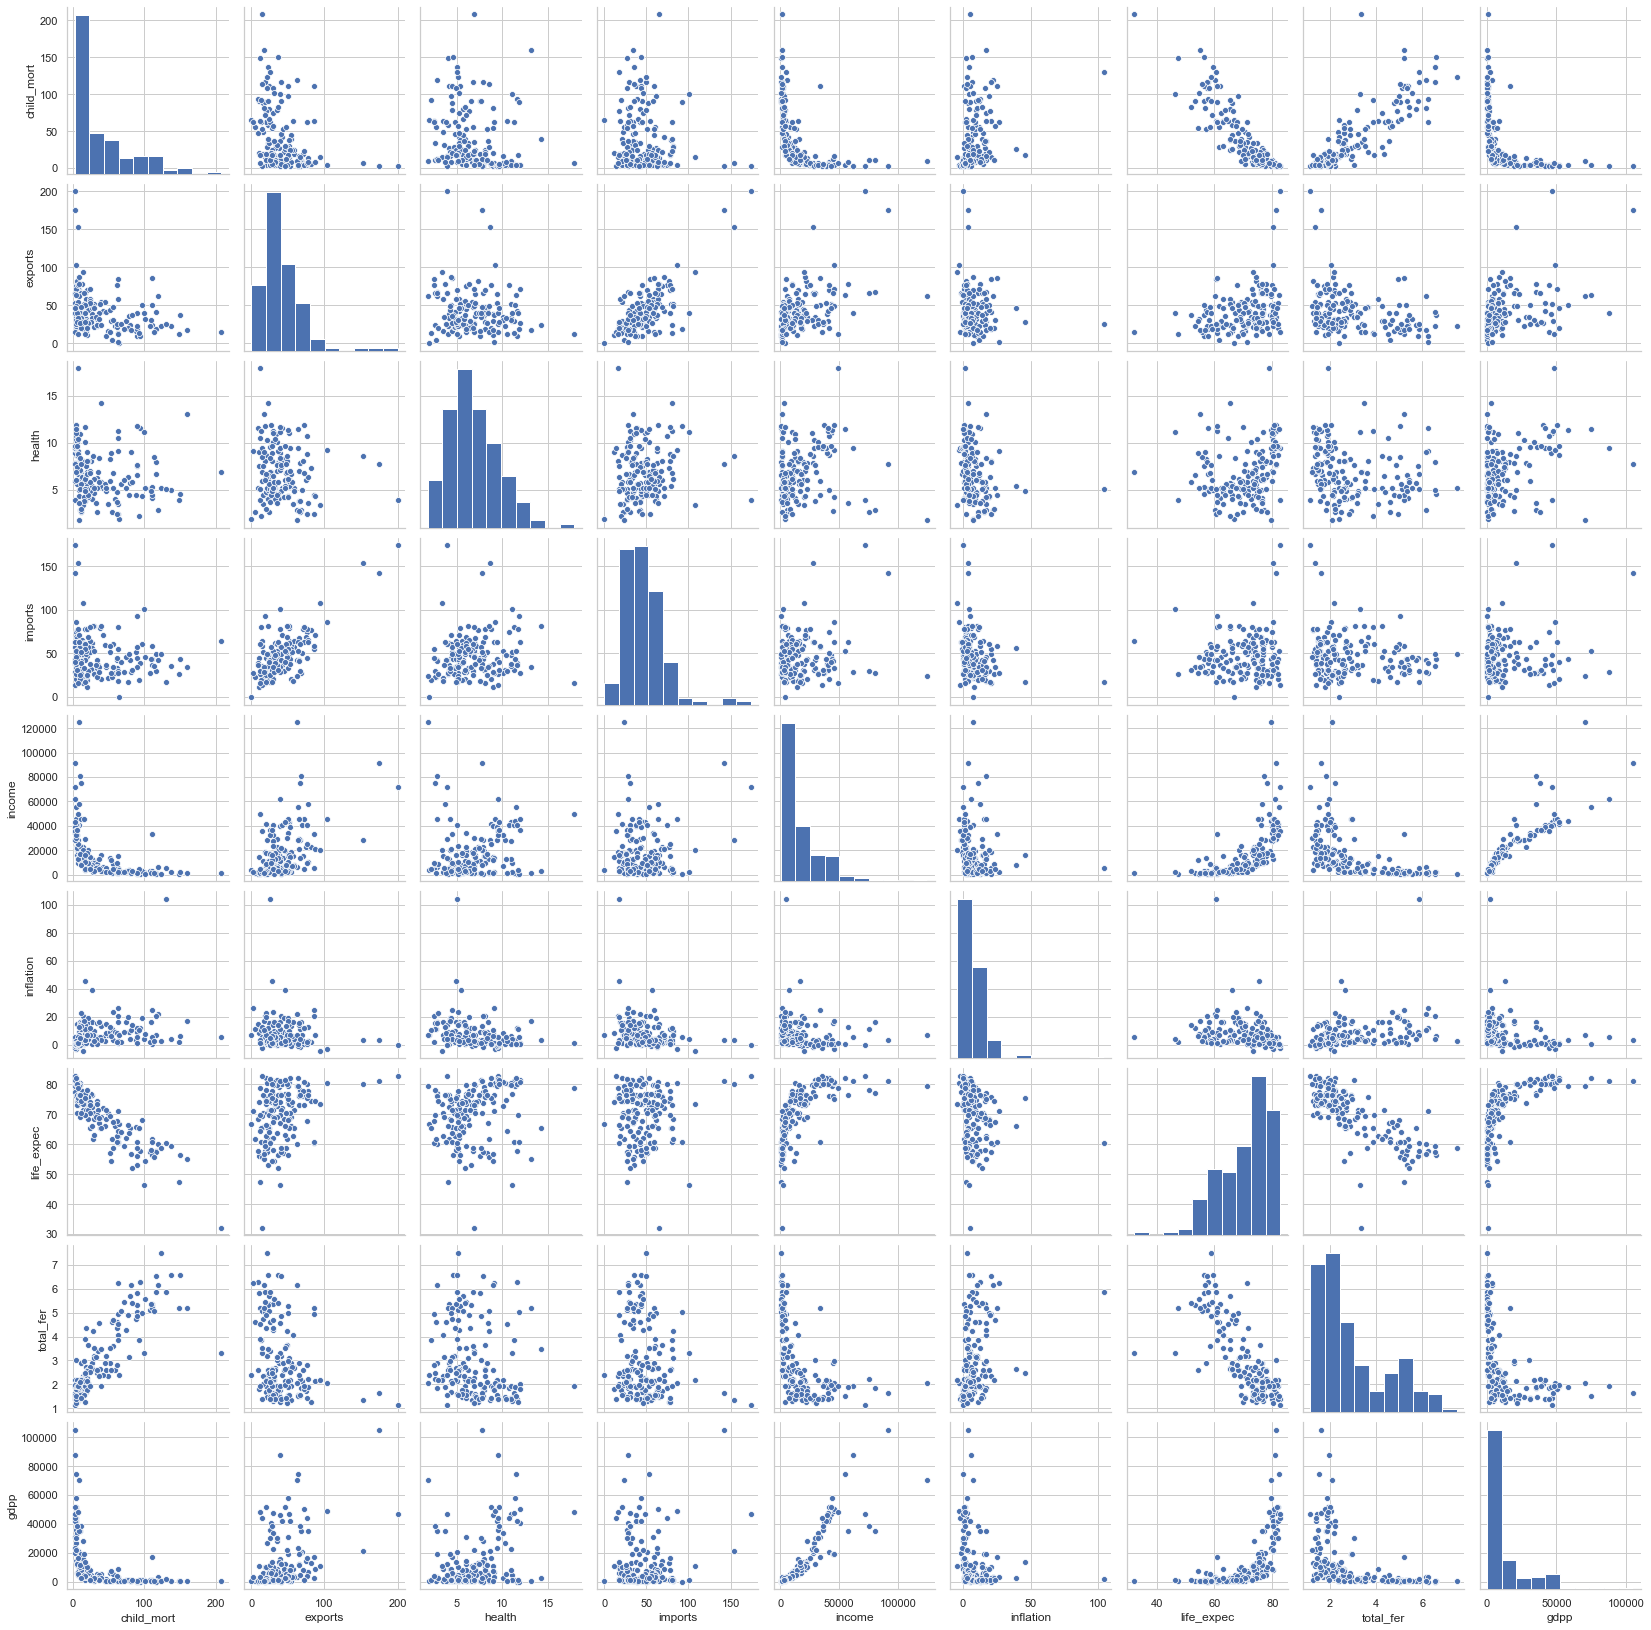

In [9]:
#Data Analysis by plotting multiple bivariate plots using seaborn's pairplot 
plt.figure(figsize = (25,25))
sns.pairplot(df)

#### Correlation Heatmap

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

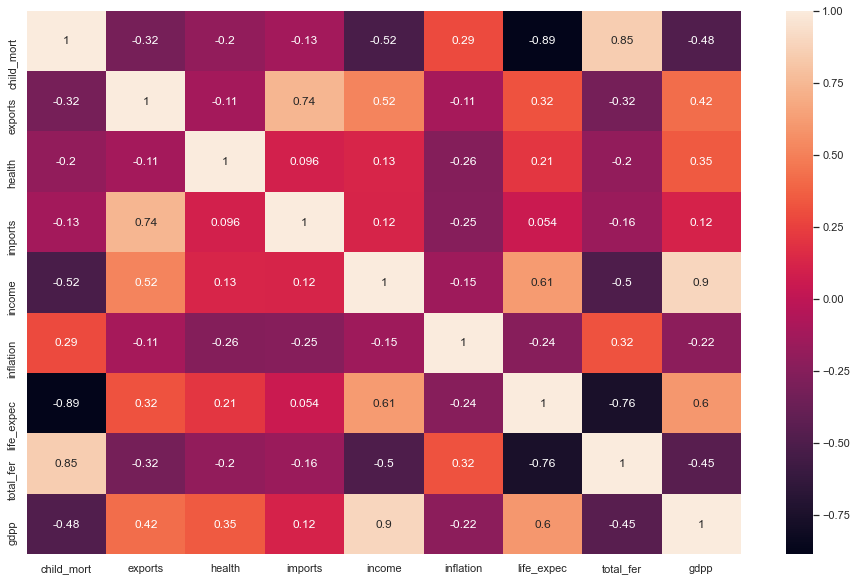

In [10]:
plt.figure(figsize=(16,10))
cor=df.corr()
sns.heatmap(cor, annot =True)
plt.plot



#### Taking log for all features except inflation - since that has non-zero values

In [11]:
# Inflation has non-zero values
df_log = np.log(df.drop('inflation', axis =1)) 

In [12]:
df_log = pd.concat([df_log, df['inflation']], axis =1 )

In [13]:
df_log.describe()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.047884,3.504018,1.835011,3.704301,9.115402,4.247485,0.961887,8.499637,7.781832
std,1.160054,0.769174,0.423748,0.686137,1.228979,0.138750,0.480728,1.500006,10.570704
min,0.955511,-2.216407,0.593327,-2.719617,6.411818,3.468856,0.139762,5.442418,-4.210000
25%,2.109312,3.169686,1.593306,3.407820,8.118197,4.178992,0.585001,7.192821,1.810000
50%,2.960105,3.555348,1.843719,3.768153,9.206332,4.291828,0.879627,8.446771,5.390000
75%,4.128745,3.938664,2.151745,4.073288,10.034506,4.341205,1.355805,9.549611,10.750000
max,5.337538,5.298317,2.884801,5.159055,11.736069,4.416428,2.013569,11.561716,104.000000


<Figure size 1080x1080 with 0 Axes>

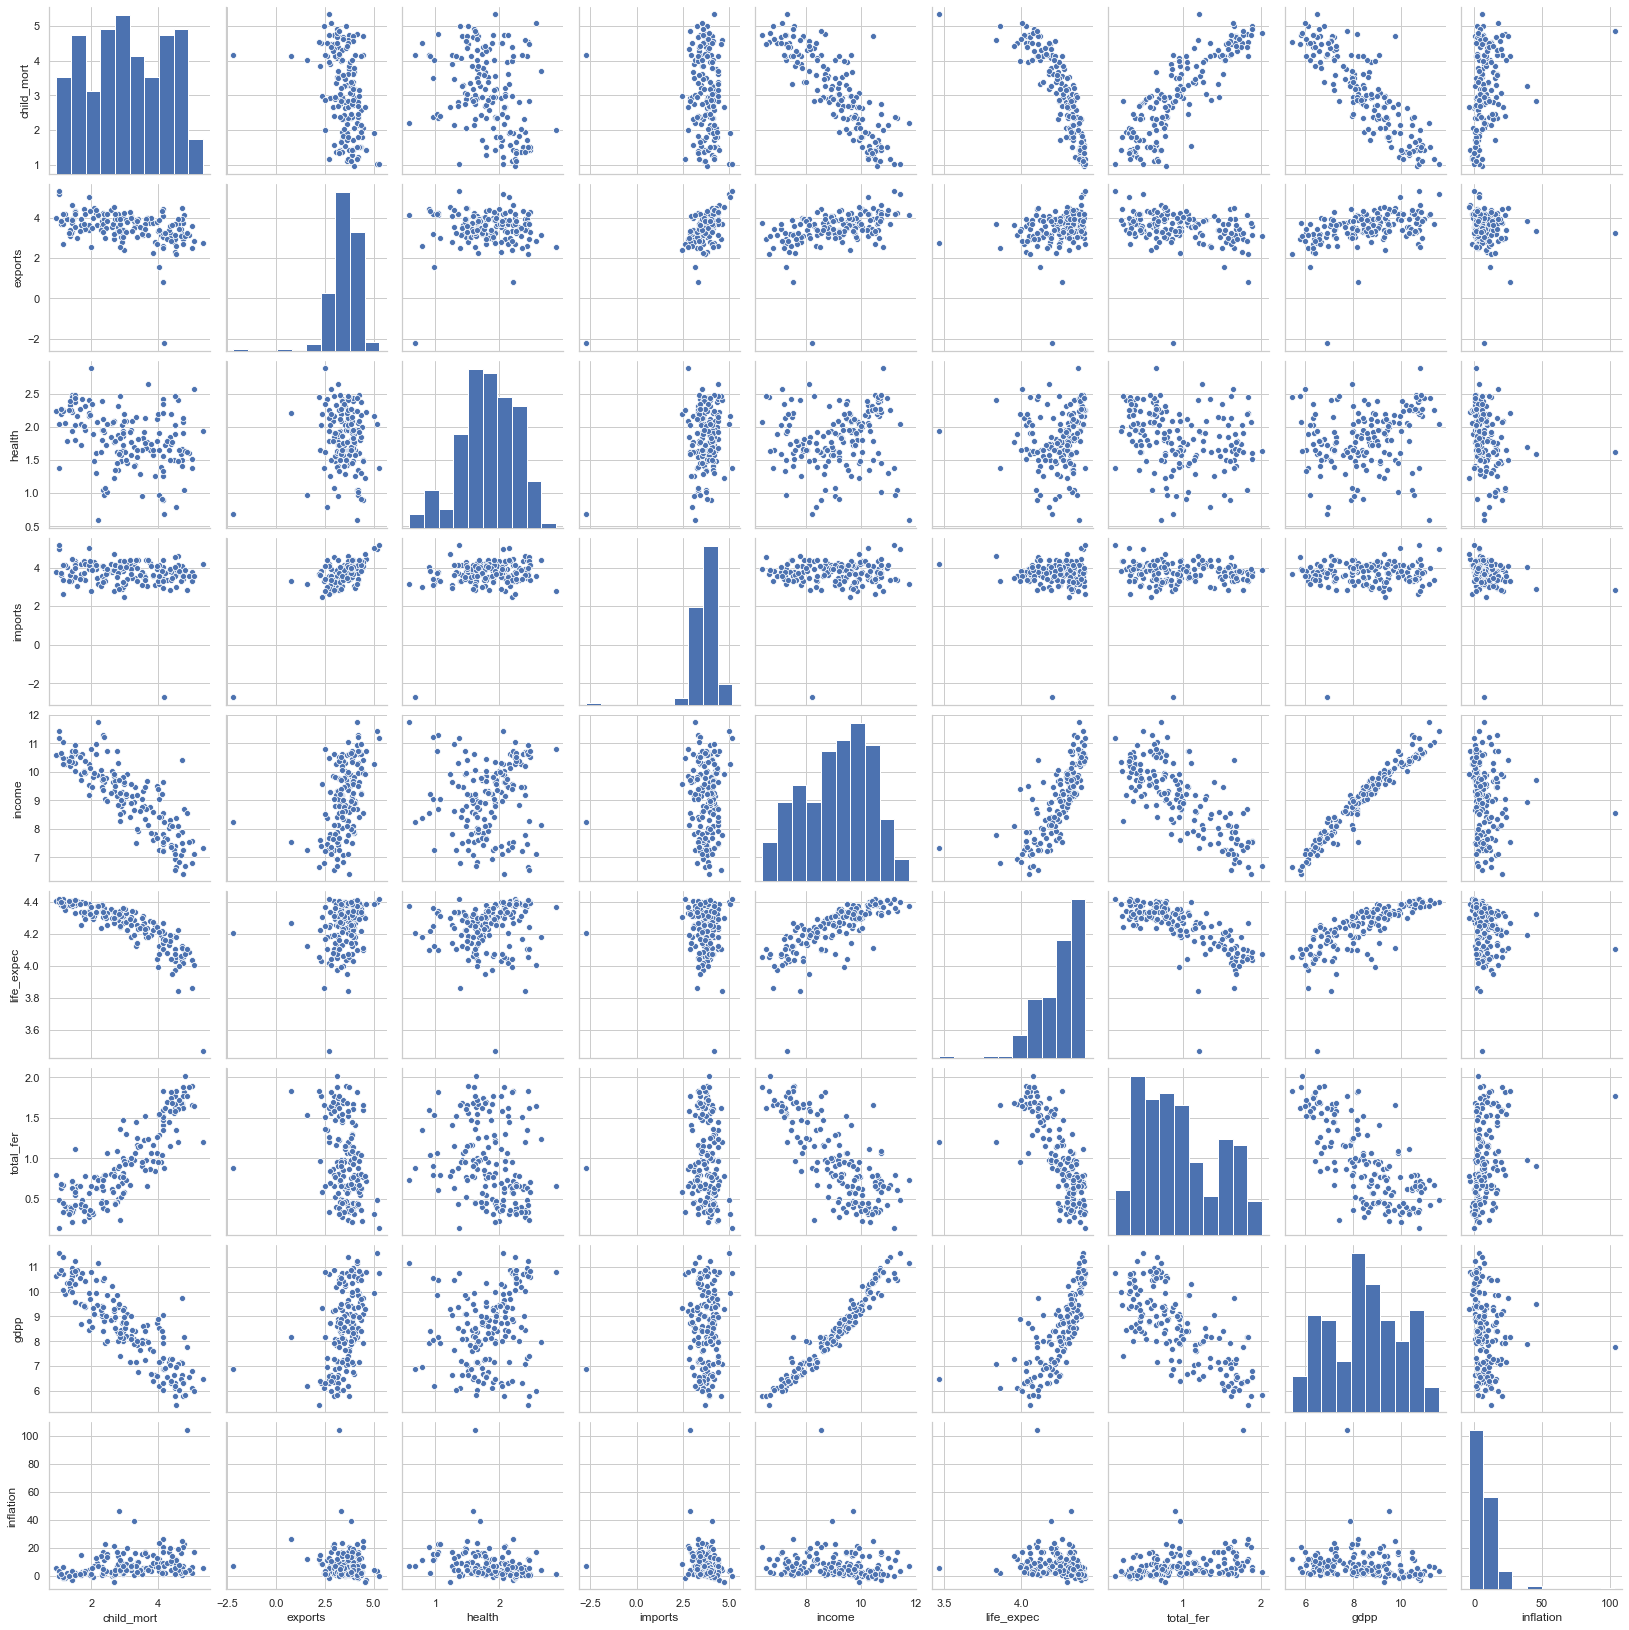

In [14]:
plt.figure(figsize = (15,15))
sns.pairplot(df_log)

#### Removing Outliers

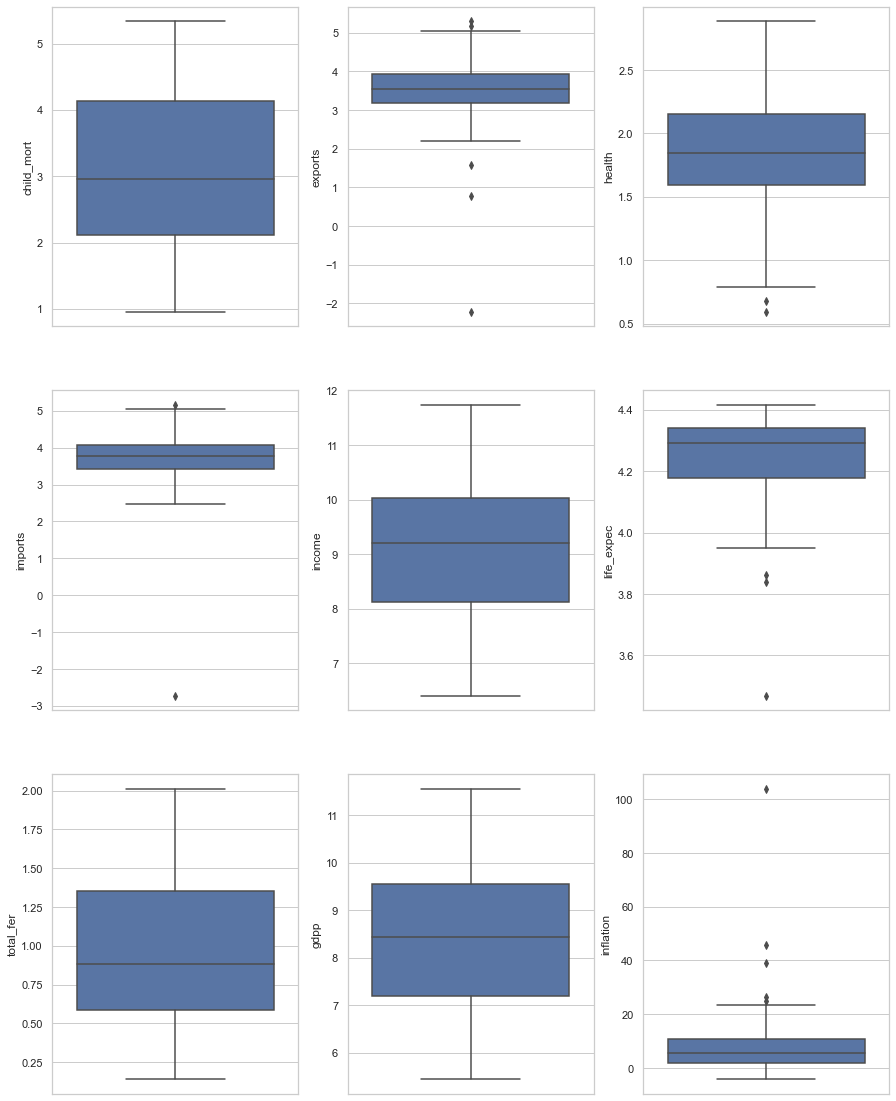

In [15]:
# Trying to determine columns having outliers
plt.figure(figsize=(15, 20))
for i, x_var in enumerate(df_log.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = x_var, data = df_log, orient = 'v')

In [16]:
#Creating another dataframe for removing outliers
df_no_outliers = df_log.copy()

### Performing Outlier analysis before PCA (Omitted this part) since it was told to perform outlier ananlysis after PCA in the preassignment session

In [17]:
# # Method for outlier treatment using inter-quartile range technique
# for i, var in enumerate(df_no_outliers.columns):
#     Q1 = df_no_outliers[var].quantile(0.05)
#     Q3 = df_no_outliers[var].quantile(0.95)
#     IQR = Q3 - Q1
#     df_no_outliers = df_no_outliers[(df_no_outliers[var] >= Q1 - 1.5*IQR) & (df_no_outliers[var] <= Q3 + 1.5*IQR)]

In [18]:
df_no_outliers.describe()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.047884,3.504018,1.835011,3.704301,9.115402,4.247485,0.961887,8.499637,7.781832
std,1.160054,0.769174,0.423748,0.686137,1.228979,0.138750,0.480728,1.500006,10.570704
min,0.955511,-2.216407,0.593327,-2.719617,6.411818,3.468856,0.139762,5.442418,-4.210000
25%,2.109312,3.169686,1.593306,3.407820,8.118197,4.178992,0.585001,7.192821,1.810000
50%,2.960105,3.555348,1.843719,3.768153,9.206332,4.291828,0.879627,8.446771,5.390000
75%,4.128745,3.938664,2.151745,4.073288,10.034506,4.341205,1.355805,9.549611,10.750000
max,5.337538,5.298317,2.884801,5.159055,11.736069,4.416428,2.013569,11.561716,104.000000


<Figure size 1080x720 with 0 Axes>

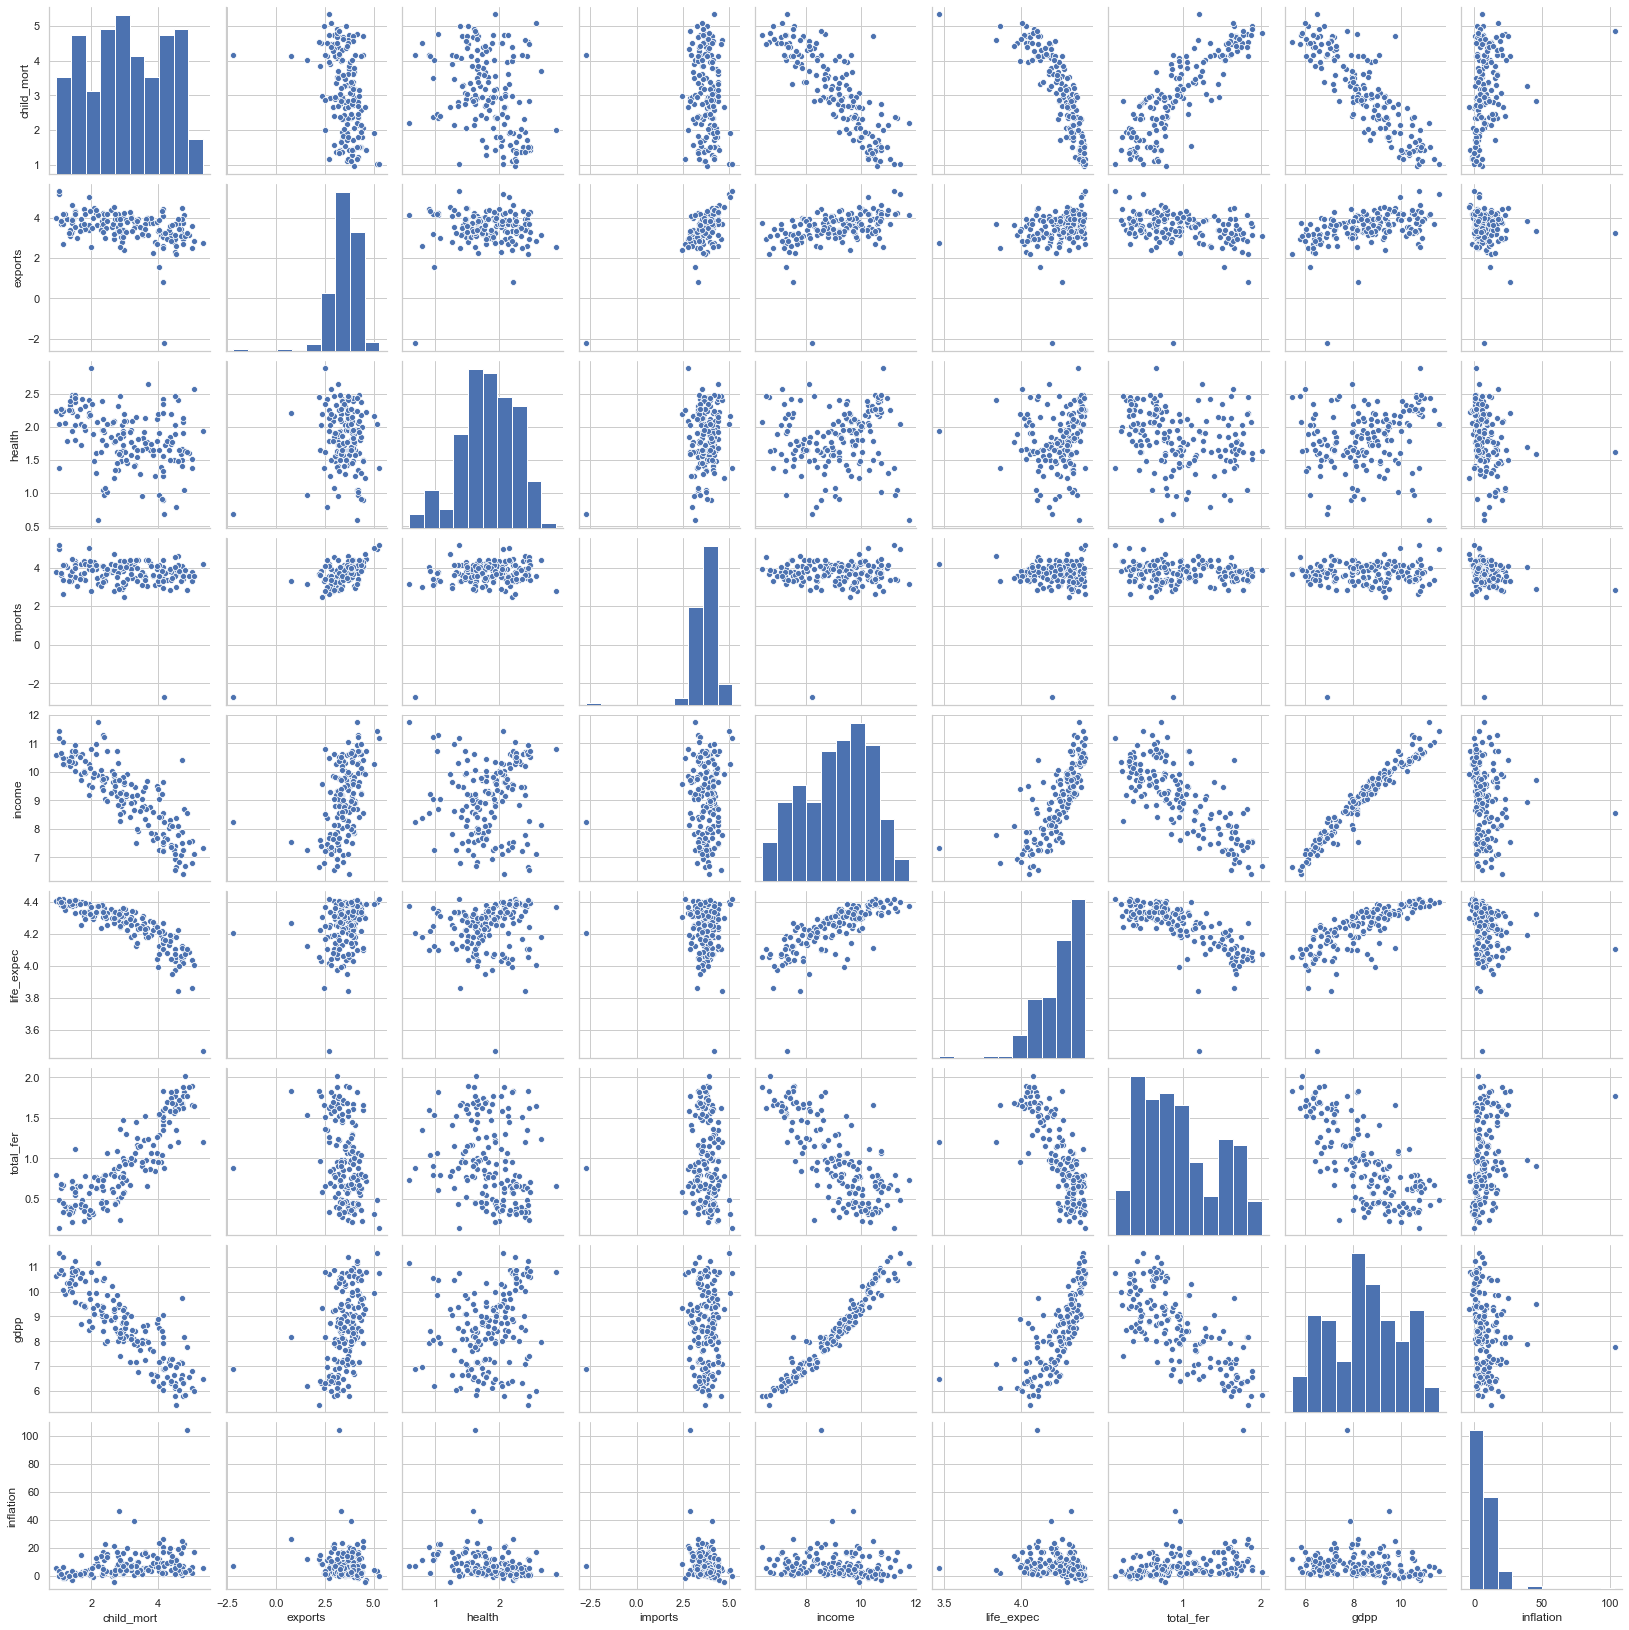

In [19]:
plt.figure(figsize=(15,10))
sns.pairplot(df_no_outliers)

In [20]:
df_no_outliers.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
country,,,,,,,,,
Afghanistan,4.502029,2.302585,2.025513,3.804438,7.383989,4.028917,1.761300,6.315358,9.44
Albania,2.809403,3.332205,1.879465,3.883624,9.203316,4.334673,0.500775,8.316300,4.49
Algeria,3.306887,3.648057,1.427916,3.446808,9.464983,4.337291,1.061257,8.402904,16.10
Angola,4.779123,4.131961,1.047319,3.758872,8.682708,4.096010,1.818077,8.169053,22.40
Antigua and Barbuda,2.332144,3.817712,1.796747,4.075841,9.857444,4.341205,0.756122,9.409191,1.44


### Data Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns = df_no_outliers.columns, index=df_no_outliers.index)

In [23]:
df_scaled.describe()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-1.515754e-16,2.634287e-16,4.364440e-16,7.977650e-18,5.757204e-16,-1.723173e-15,-2.366703e-16,3.383853e-16,3.988825e-18
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.809110e+00,-7.459472e+00,-2.939059e+00,-9.390595e+00,-2.206478e+00,-5.628619e+00,-1.715309e+00,-2.044268e+00,-1.137852e+00
25%,-8.115091e-01,-4.359711e-01,-5.721137e-01,-4.334014e-01,-8.138497e-01,-4.951252e-01,-7.863465e-01,-8.738276e-01,-5.666409e-01
50%,-7.589583e-02,6.693539e-02,2.061154e-02,9.333909e-02,7.421119e-02,3.205559e-01,-1.716296e-01,-3.535021e-02,-2.269504e-01
75%,9.345347e-01,5.667825e-01,7.497072e-01,5.393911e-01,7.501095e-01,6.774915e-01,8.218855e-01,7.020849e-01,2.816364e-01
max,1.979683e+00,2.339779e+00,2.484844e+00,2.126585e+00,2.138808e+00,1.221273e+00,2.194266e+00,2.047517e+00,9.129718e+00


In [24]:
df_scaled.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
country,,,,,,,,,
Afghanistan,1.257285,-1.566676,0.450917,0.146381,-1.413059,-1.580003,1.667924,-1.460560,0.157336
Albania,-0.206196,-0.224045,0.105222,0.262136,0.071749,0.630275,-0.962078,-0.122592,-0.312347
Algeria,0.223939,0.187829,-0.963592,-0.376408,0.285304,0.649198,0.207329,-0.064683,0.789274
Angola,1.496866,0.818843,-1.864462,0.079772,-0.353135,-1.094994,1.786385,-0.221051,1.387054
Antigua and Barbuda,-0.618844,0.409060,-0.090571,0.543123,0.605603,0.677491,-0.429314,0.608191,-0.601749


### Performing PCA (dimensionality reduction)

In [25]:
#Importing the PCA module from sklearn.decomposition
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [26]:
pca.fit(df_scaled)

PCA(random_state=42, svd_solver='randomized')

### Performing outlier analysis after PCA 

In [27]:
# Method for outlier treatment using inter-quartile range technique
for i, var in enumerate(df_scaled.columns):
    Q1 = df_scaled[var].quantile(0.05)
    Q3 = df_scaled[var].quantile(0.95)
    IQR = Q3 - Q1
    df_scaled = df_scaled[(df_scaled[var] >= Q1 - 1.5*IQR) & (df_scaled[var] <= Q3 + 1.5*IQR)]

In [28]:
df_scaled.describe()


,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,-0.015390,0.047368,0.019634,0.064424,0.007234,0.008351,-0.009112,0.009523,-0.054905
std,0.998635,0.822174,0.985213,0.683409,1.006817,1.005420,1.000460,1.004823,0.712030
min,-1.809110,-3.541109,-2.939059,-1.807101,-2.206478,-5.628619,-1.715309,-2.044268,-1.137852
25%,-0.848212,-0.435971,-0.567303,-0.409365,-0.817499,-0.495125,-0.792158,-0.863772,-0.570436
50%,-0.080387,0.081754,0.024354,0.093339,0.109491,0.330438,-0.197765,-0.032487,-0.250672
75%,0.887324,0.568052,0.763469,0.543123,0.753689,0.677491,0.805753,0.728274,0.267404
max,1.979683,2.339779,2.484844,2.126585,2.138808,1.221273,2.194266,2.047517,3.616865


<Figure size 1080x720 with 0 Axes>

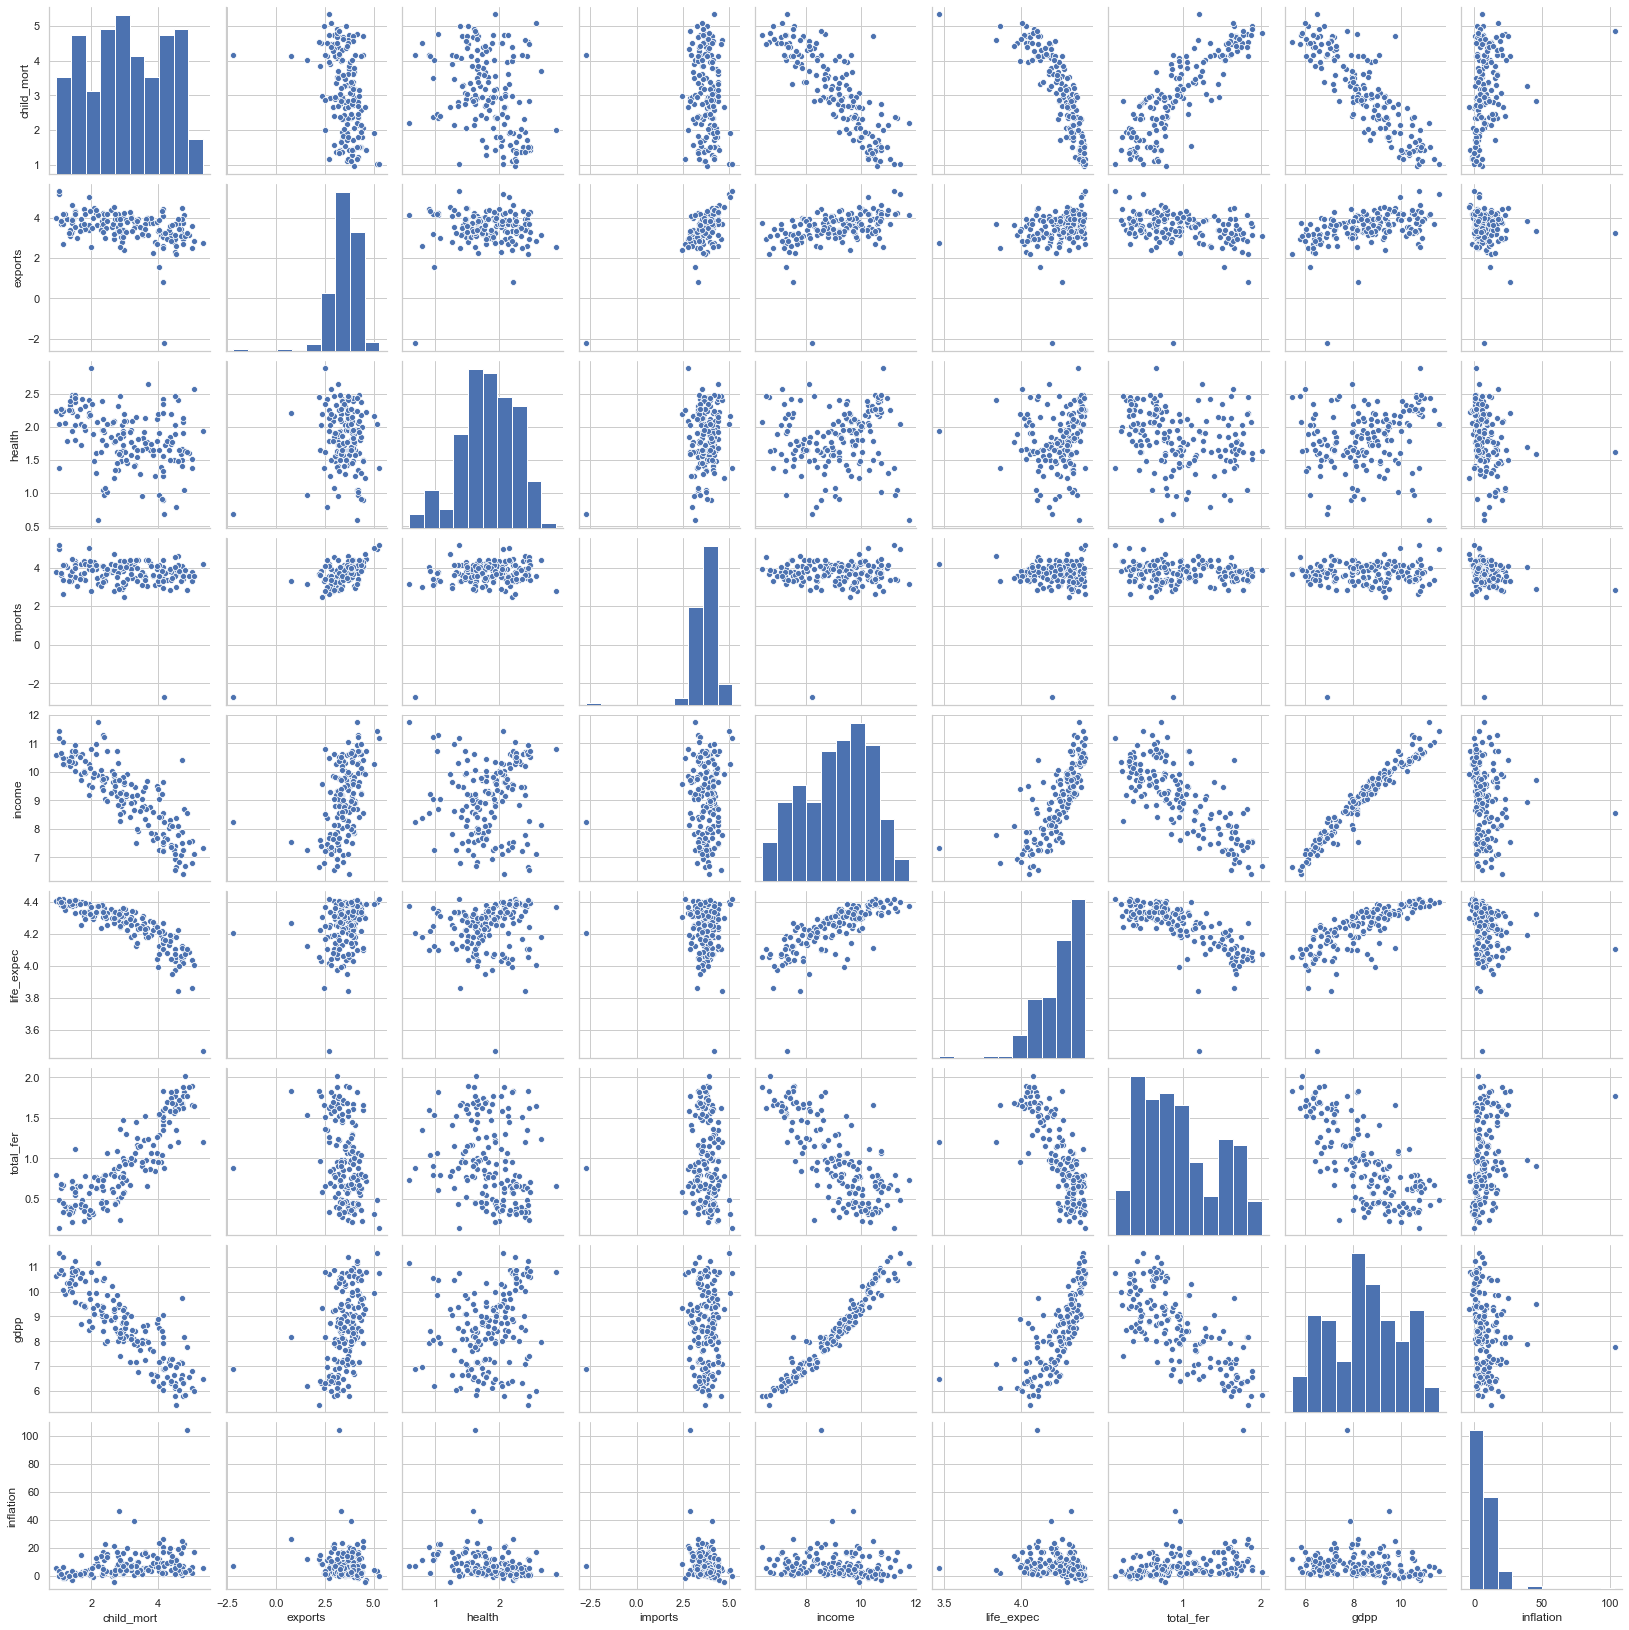

In [29]:
plt.figure(figsize=(15,10))
sns.pairplot(df_no_outliers)

In [30]:
df_no_outliers.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
country,,,,,,,,,
Afghanistan,4.502029,2.302585,2.025513,3.804438,7.383989,4.028917,1.761300,6.315358,9.44
Albania,2.809403,3.332205,1.879465,3.883624,9.203316,4.334673,0.500775,8.316300,4.49
Algeria,3.306887,3.648057,1.427916,3.446808,9.464983,4.337291,1.061257,8.402904,16.10
Angola,4.779123,4.131961,1.047319,3.758872,8.682708,4.096010,1.818077,8.169053,22.40
Antigua and Barbuda,2.332144,3.817712,1.796747,4.075841,9.857444,4.341205,0.756122,9.409191,1.44


#### Making Screenplot

Text(0, 0.5, 'cumulative explained variance')

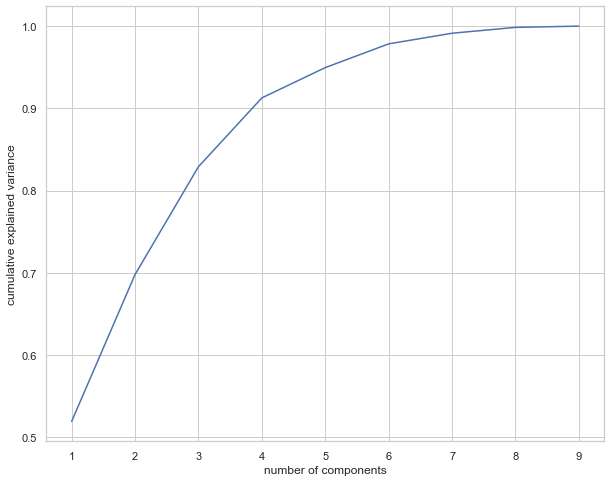

In [31]:
#Making the screeplot
plt.figure(figsize = (10,8))
sns.lineplot(y = np.cumsum(pca.explained_variance_ratio_), x = range(1,len(df_scaled.columns)+1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [32]:
#pca_again
pca_again = PCA(0.94)

In [33]:
df_pca = pca_again.fit_transform(df_scaled)
df_pca.shape

(165, 5)

In [34]:

# # Method for outlier treatment using inter-quartile range technique
# for i, var in enumerate(df_no_outliers.columns):
#     Q1 = df_no_outliers[var].quantile(0.05)
#     Q3 = df_no_outliers[var].quantile(0.95)
#     IQR = Q3 - Q1
#     df_no_outliers = df_no_outliers[(df_no_outliers[var] >= Q1 - 1.5*IQR) & (df_no_outliers[var] <= Q3 + 1.5*IQR)]

#### Choosing the number of principal components = 5

In [35]:
df_pca = pd.DataFrame(df_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = df_scaled.index)

In [36]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,3.476443,-1.128593,0.257449,0.115478,-0.166041
Albania,-0.698410,-0.272577,0.056779,-0.712693,0.526373
Algeria,0.054288,1.240218,0.746989,0.147524,0.440362
Angola,2.388262,2.390629,-0.141997,1.183710,-0.300872
Antigua and Barbuda,-1.382952,0.181993,-0.413229,-0.343896,-0.130976


#### Visualizing the principal components

In [37]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':list(df_scaled.columns)})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.444310,-0.079367,child_mort
1,-0.240511,-0.561360,exports
2,-0.144080,-0.156260,health
3,-0.103216,-0.742524,imports
4,-0.427584,0.132699,income
5,-0.394286,0.188802,life_expec
6,0.404796,-0.110566,total_fer
7,-0.429402,0.113183,gdpp
8,0.163693,0.156606,inflation


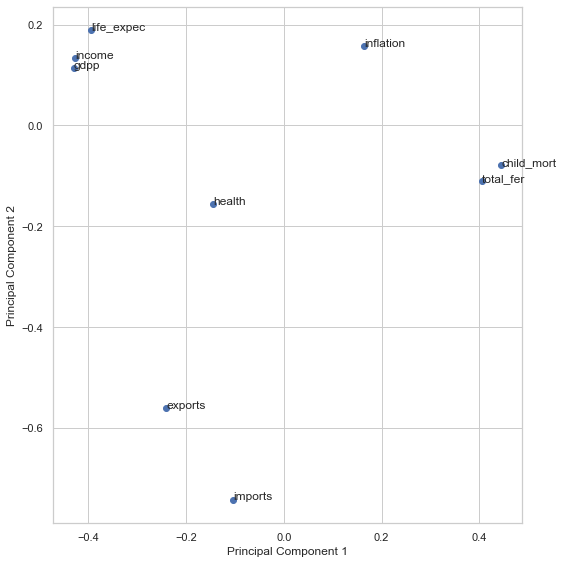

In [38]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()


### Step 4: Perform clustering

#### Check Hopkins Statistics (Clustering potential)

#### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
* If the value is between {0.01, ...,0.3}, the data is regularly spaced.
* If the value is around 0.5, it is random.
* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [39]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
print("DF_PCA: ", hopkins(df_pca))
print("DF_scaled: ", hopkins(df_scaled))

DF_PCA:  0.6912377356678905
DF_scaled:  0.7611900845204108


#### Select optimum number of clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score
sse = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init = 50).fit(df_pca)
    sse.append([k, silhouette_score(df_pca, kmeans.labels_)])
sns.pointplot(pd.DataFrame(sse)[0], y = pd.DataFrame(sse)[1])
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')

In [ ]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append([num_clusters, model_clus.inertia_])

sns.pointplot(x = pd.DataFrame(ssd)[0], y = pd.DataFrame(ssd)[1])
plt.xlabel('No. of clusters')
plt.ylabel('Sum of squared errors')

#### Optimum number of clusters through heirarchical clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
plt.figure(figsize=(20,15))
mergings_s = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings_s, labels=df_pca.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
mergings_c = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings_c, labels=df_pca.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Optional to take average

In [ ]:
plt.figure(figsize=(20,15))
mergings_a = linkage(df_pca, method = "average", metric='euclidean')
dendrogram(mergings_a, labels=df_pca.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

### We can take the number of clusters to be either 3 or 4

### Perform clustering with # of clusters = 4

In [ ]:
# Kmeans with K=4
K_means_4 = KMeans(n_clusters = 4, max_iter=50)
K_means_4.fit(df_pca)

### Step 5) Analysis of clusters formed

#### Cluster analysis for # of clusters = 4

In [ ]:
# Combining original data, principal components, K-means cluster IDs & Hierarchical clustering cluster IDs
df_2 = df_pca.merge(df, on = 'country')
df_2.head()

In [ ]:
K_cluster_labels_4 = pd.Series(K_means_4.labels_, index = df_pca.index) # Merging data with K-mean clusterID data

In [ ]:
df_3 = pd.concat([df_2, K_cluster_labels_4], axis = 1)
df_3.columns

In [ ]:
df_3 = df_3.rename(columns={0: 'K_clust_4'})
df_3.head()

In [ ]:
# Merging data with hierarchical clusterID data
# Cutting hierarchical dendogram with 4 clusters 
H_cluster_labels_4 = pd.Series(cut_tree(mergings_c, n_clusters = 4).reshape(-1,), index = df_pca.index)

In [ ]:
df_f = pd.concat([df_3, H_cluster_labels_4], axis =1)
df_f = df_f.rename(columns={0: 'H_clust_4'})

In [ ]:
df_f.head()

In [ ]:
df_f.K_clust_4.value_counts()

In [ ]:
df_f.H_clust_4.value_counts()

In [ ]:
ct = pd.crosstab(df_f['H_clust_4'], df_f['K_clust_4'])
print(ct)

#### Effectively, K-means clustering has broken down the cluster '1' of Hierarchical clustering - into 2 sub-clusters
We will use the clusters formed by K-means for further analysis

### Analysis of cluster data

In [ ]:
df_f.columns

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'K_clust_4', data = df_f, palette = 'RdYlGn')

In [ ]:
cluster_summary = df_f.groupby('K_clust_4').agg({'child_mort': 'mean', 'exports': 'mean', 'health': 'mean',
                               'imports': 'mean', 'income': 'mean', 'inflation': 'mean', 
                             'life_expec': 'mean', 'total_fer': 'mean', 'gdpp': ['mean', 'count']}).round(0)
cluster_summary

#### Relative importance of segment attributes

In [ ]:
population_avg = df_f.drop(['K_clust_4', 'H_clust_4'], axis = 1).mean()

In [ ]:
cluster_avg_4 = df_f.drop('H_clust_4', axis =1).groupby('K_clust_4').mean()

In [ ]:
relative_imp_4 = cluster_avg_4/ population_avg - 1

In [ ]:
relative_imp_4

In [ ]:
plt.figure(figsize = (15,5))
PCs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
ax = sns.heatmap(relative_imp_4.drop(PCs, axis = 1), annot = True, fmt = '.2f', vmax = 1, vmin = -1, cmap = 'RdYlGn')
ax.tick_params(labelsize=13)


In [ ]:
plt.figure(figsize = (15,5))
PCs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
ax = sns.heatmap(relative_imp_4[PCs], annot = True, cmap = 'RdYlGn')
ax.tick_params(labelsize=13)

### Line Plot analysis

In [ ]:
df_sp = df_scaled.copy()
df_sp['K_clust_4'] = K_cluster_labels_4

In [ ]:
df_sp.head()

In [ ]:
df_melt = pd.melt(df_sp.reset_index(), id_vars = ['country','K_clust_4'], var_name = 'Feature', value_name = 'Value')

In [ ]:
df_melt.head()

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Feature', y = 'Value', data = df_melt, hue = 'K_clust_4', palette = "RdYlBu")

### Observation: Cluster #1 contains countries that are in direct need of financial aid, since:
* It has disproportionately high child mortality rate, total_fer & inflation.
* It has lowest gdpp, income & life_expectancy.


#### Barplots for features

In [ ]:
sns.barplot(x = cluster_summary.reset_index().K_clust_4, y = cluster_summary['gdpp']['mean'])

In [ ]:
sns.barplot(x = cluster_summary.reset_index().K_clust_4, y = cluster_summary['income']['mean'])

In [ ]:
sns.barplot(x = cluster_summary.reset_index().K_clust_4, y = cluster_summary['child_mort']['mean'])

#### Barplots for Principal components

In [ ]:
cluster_summary_PC = df_f.groupby('K_clust_4').agg({'PC1': 'mean', 'PC2': 'mean', 'PC3': 'mean',
                               'PC4': 'mean', 'PC5': ['mean', 'count']}).round(2)
cluster_summary_PC

In [ ]:
sns.barplot(x = cluster_summary_PC.reset_index().K_clust_4, y = cluster_summary_PC['PC1']['mean'])

In [ ]:
sns.barplot(x = cluster_summary_PC.reset_index().K_clust_4, y = cluster_summary_PC['PC2']['mean'])

### Cluster analysis for # of clusters = 3

In [ ]:
# Kmeans with K=3
K_means_3 = KMeans(n_clusters = 3, max_iter=50)
K_means_3.fit(df_pca)

In [ ]:
K_cluster_labels_3 = pd.Series(K_means_3.labels_, index = df_pca.index) # Merging data with K-mean clusterID data
df_f = pd.concat([df_f, K_cluster_labels_3], axis = 1)
df_f = df_f.rename(columns={0: 'K_clust_3'})
df_f.K_clust_3.value_counts()

In [ ]:
ct = pd.crosstab(df_f['K_clust_4'], df_f['K_clust_3'])
print(ct)

### Observation: Cluster #1 of 4-cluster K-means is the same as cluster #1 for 3-cluster K-means; This is the cluster with countries in dire need of financial aid

In [ ]:
plt.figure(figsize = (12,8))
#cmap = sns.cubehelix_palette(dark=.9, light=.3, as_cmap=True)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'K_clust_3', data = df_f, palette= 'Set1')
#,  = 'flatui')

In [ ]:
cluster_summary_3 = df_f.groupby('K_clust_3').agg({'child_mort': 'mean', 'exports': 'mean', 'health': 'mean',
                               'imports': 'mean', 'income': 'mean', 'inflation': 'mean', 
                             'life_expec': 'mean', 'total_fer': 'mean', 'gdpp': ['mean', 'count']}).round(0)
cluster_summary_3

In [ ]:
population_avg = df_f.drop(['K_clust_4', 'H_clust_4', 'K_clust_3'], axis = 1).mean()
cluster_avg_3 = df_f.drop(['H_clust_4', 'K_clust_4'], axis =1).groupby('K_clust_3').mean()
relative_imp_3 = cluster_avg_3/ population_avg - 1
relative_imp_3

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.heatmap(relative_imp_3.drop(PCs, axis = 1), annot = True, fmt = '.2f', vmax = 1, vmin = -1, cmap = 'RdYlGn')
ax.tick_params(labelsize=13)

In [ ]:
df_sp_3 = df_scaled.copy()
df_sp_3['K_clust_3'] = K_cluster_labels_3
df_melt_3 = pd.melt(df_sp_3.reset_index(), id_vars = ['country','K_clust_3'], var_name = 'Feature', value_name = 'Value')
df_melt_3.head()

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Feature', y = 'Value', data = df_melt_3, hue = 'K_clust_3', palette = "Set1")

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Feature', y = 'Value', data = df_melt, hue = 'K_clust_4', palette = "RdYlBu")

In [ ]:
df_melt.info()

In [ ]:
clu0=df_melt.loc[df_melt['K_clust_4']==1]
clu0_child_mort=clu0.loc[clu0['Feature']=='child_mort']
clu0_income=clu0.loc[clu0['Feature']=='income']
clu0_gdpp=clu0.loc[clu0['Feature']=='gdpp']


In [ ]:
# Contries with highest child mortality rate which needs aid
clu0_child_mort.nlargest(15,'Value')

In [ ]:
# Countries with less income which requires aid
clu0_income.nsmallest(15,'Value')

In [ ]:
# Countries with less Ggpp which requires aid
clu0_gdpp.nsmallest(15,'Value')

### We can clearly see that countries are common in each of these dataframe with respect to (child_mort, income and gdpp).
### Some of those countries are:
 1. Congo, Dem. Rep.
 2. Sierra Leone
 3. Niger
 4. Mozambique
 5. Guinea-Bissau
 6. Central African Republic
 7. Liberia